## Objective:
- Analyzing historical climate data to understand trends and predict future climate patterns in Tanzania

In [21]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot styling
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')
%matplotlib inline

### 2. Data Preprocessing:
Tasks:

- Handle missing values (if any).

- Convert data types as necessary (e.g., datetime conversion).

- Feature engineering: Extract relevant features such as seasonal trends, average temperatures, precipitation levels.

- Encoding categorical variables (if applicable).

- Output: Cleaned dataset ready for exploratory data analysis (EDA) and modeling.

In [2]:
climatedf = pd.read_csv("data/tanzania_climate_data.csv")
climatedf.head()

,Year,Month,Average_Temperature_C,Total_Rainfall_mm,Max_Temperature_C,Min_Temperature_C
0,2000,1,26.1,19.8,32.0,21.9
1,2000,2,25.8,87.3,29.5,22.7
2,2000,3,26.8,266.5,29.9,21.8
3,2000,4,26.3,136.7,30.1,22.9
4,2000,5,26.0,63.1,30.7,22.4


In [3]:
climatedf.shape

(252, 6)

In [4]:
climatedf.info()   #no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   252 non-null    int64  
 1   Month                  252 non-null    int64  
 2   Average_Temperature_C  252 non-null    float64
 3   Total_Rainfall_mm      252 non-null    float64
 4   Max_Temperature_C      252 non-null    float64
 5   Min_Temperature_C      252 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 11.9 KB


### 3. Exploratory Data Analysis (EDA):
Tasks:

- Statistical summaries: Descriptive statistics (mean, median, variance).

- Data visualization: Plot time series of temperature trends, precipitation levels over the years.

- Identify correlations: Heatmaps, scatter plots to understand relationships between variables.

- Seasonal decomposition: Identify seasonal patterns using decomposition techniques (e.g., using seasonal_decompose from statsmodels).

- Output: Visualizations (line plots, histograms, heatmaps) depicting historical climate trends and patterns.



In [17]:
# Set display format for float numbers
pd.options.display.float_format = '{:.2f}'.format

In [10]:
climatedf.describe()

,Year,Month,Average_Temperature_C,Total_Rainfall_mm,Max_Temperature_C,Min_Temperature_C
count,252.00,252.00,252.00,252.00,252.00,252.00
mean,2010.00,6.50,25.71,100.36,30.58,21.70
std,6.07,3.46,0.54,80.49,1.29,0.79
min,2000.00,1.00,24.20,6.00,28.30,19.70
25%,2005.00,3.75,25.30,39.33,29.60,21.10
50%,2010.00,6.50,25.70,72.20,30.50,21.70
75%,2015.00,9.25,26.00,147.70,31.60,22.20
max,2020.00,12.00,27.50,297.40,33.70,23.70


In [31]:
# Reset display format to default
pd.reset_option('display.float_format')


In [18]:
# finding the median
climatedf.median()

Year                    2010.00
Month                      6.50
Average_Temperature_C     25.70
Total_Rainfall_mm         72.20
Max_Temperature_C         30.50
Min_Temperature_C         21.70
dtype: float64

In [19]:
#finding the variance
climatedf.var()

Year                      36.81
Month                     11.96
Average_Temperature_C      0.29
Total_Rainfall_mm       6477.85
Max_Temperature_C          1.67
Min_Temperature_C          0.63
dtype: float64

### Data visualization: Plot time series of temperature trends, precipitation levels over the years

In [20]:
climatedf.head()

,Year,Month,Average_Temperature_C,Total_Rainfall_mm,Max_Temperature_C,Min_Temperature_C
0,2000,1,26.10,19.80,32.00,21.90
1,2000,2,25.80,87.30,29.50,22.70
2,2000,3,26.80,266.50,29.90,21.80
3,2000,4,26.30,136.70,30.10,22.90
4,2000,5,26.00,63.10,30.70,22.40


In [25]:
# group by annual averages temperature and rainfall 

annual_trend = climatedf.groupby("Year").mean().reset_index()

In [26]:
annual_trend.head()

,Year,Month,Average_Temperature_C,Total_Rainfall_mm,Max_Temperature_C,Min_Temperature_C
0,2000,6.50,25.71,105.67,29.93,21.79
1,2001,6.50,25.82,85.77,30.64,21.94
2,2002,6.50,25.53,85.74,30.82,21.61
3,2003,6.50,25.60,126.85,30.09,21.68
4,2004,6.50,25.82,117.90,30.46,21.76


In [29]:
annual_trend.tail()

,Year,Month,Average_Temperature_C,Total_Rainfall_mm,Max_Temperature_C,Min_Temperature_C
16,2016,6.50,25.67,93.71,30.49,21.72
17,2017,6.50,25.72,87.27,30.28,21.90
18,2018,6.50,25.59,103.74,30.64,21.59
19,2019,6.50,25.79,102.77,30.27,21.68
20,2020,6.50,25.83,90.29,31.03,21.86


In [27]:
annual_trend.shape

(21, 6)

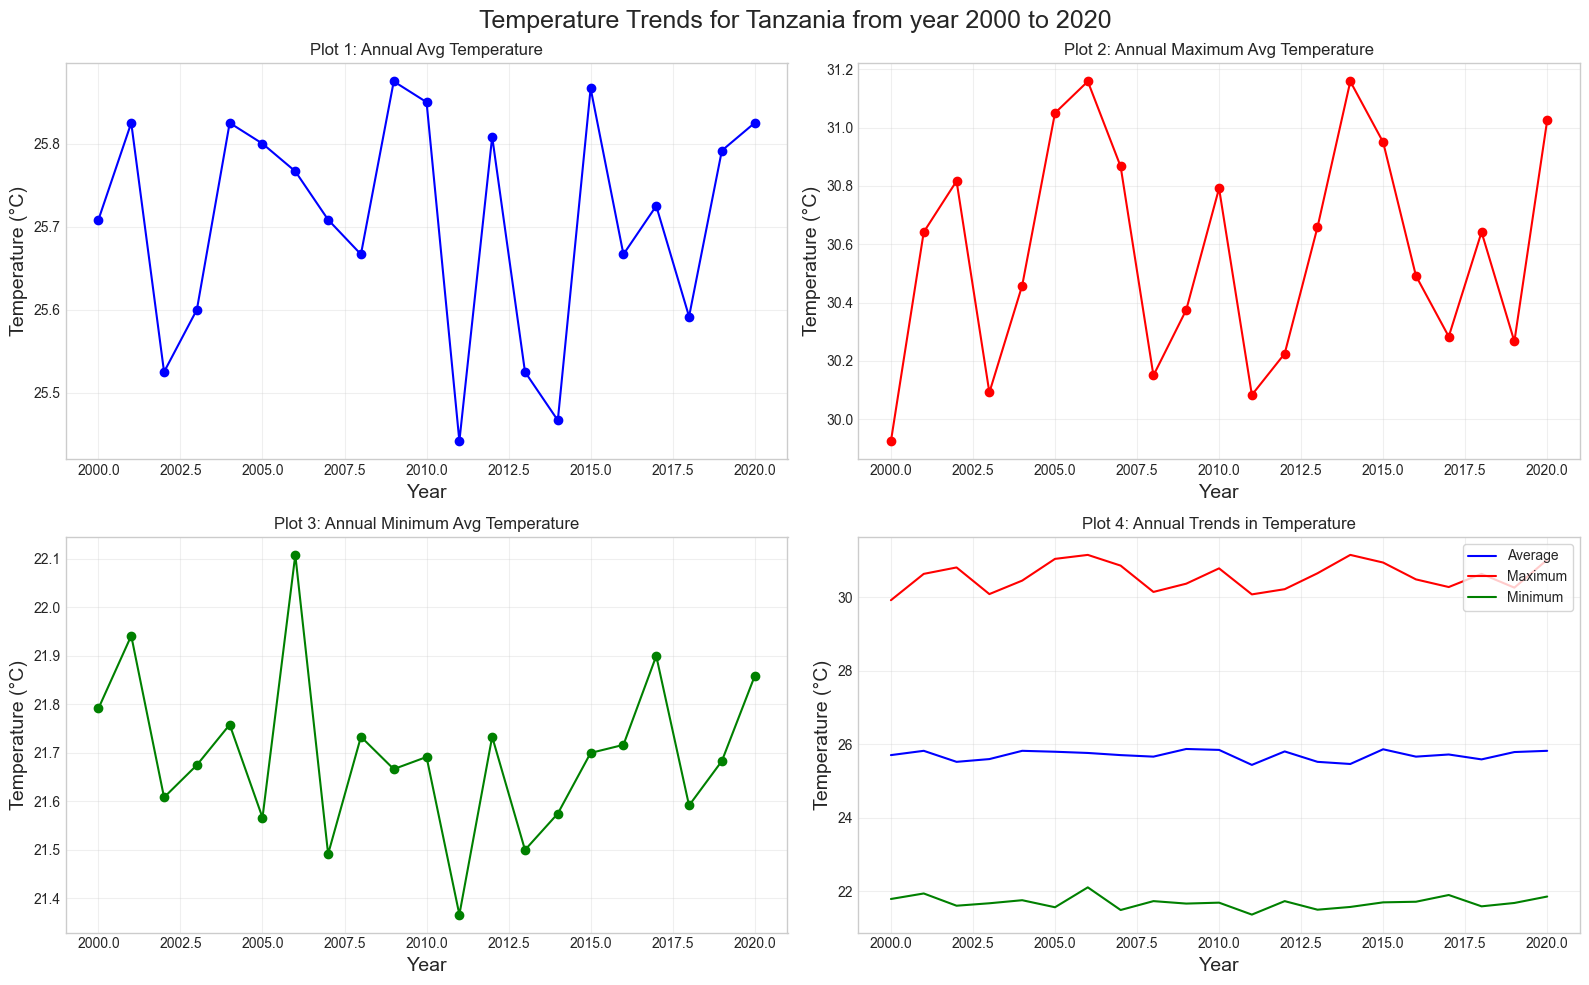

In [46]:
#plot temperature trends over the 21 years

fig, axes = plt.subplots(2, 2, figsize=(16,10))
fig.suptitle("Temperature Trends for Tanzania from year 2000 to 2020", fontsize=18)

# plot 1 annual average temperature
axes[0,0].plot(annual_trend["Year"], annual_trend["Average_Temperature_C"], 'b', marker="o")
axes[0,0].set_title("Plot 1: Annual Avg Temperature")
axes[0,0].set_xlabel("Year", fontsize=14)
axes[0,0].set_ylabel("Temperature (°C)", fontsize=14)
axes[0,0].grid(True, alpha=0.3)

# plot 2 annual maximum average temperature
axes[0,1].plot(annual_trend["Year"], annual_trend["Max_Temperature_C"], 'r', marker="o")
axes[0,1].set_title("Plot 2: Annual Maximum Avg Temperature")
axes[0,1].set_xlabel("Year", fontsize=14)
axes[0,1].set_ylabel("Temperature (°C)", fontsize=14)
axes[0,1].grid(True, alpha=0.3)

# plot 3 annual minimum average temperature
axes[1,0].plot(annual_trend["Year"], annual_trend["Min_Temperature_C"], 'g', marker="o")
axes[1,0].set_title("Plot 3: Annual Minimum Avg Temperature")
axes[1,0].set_xlabel("Year", fontsize=14)
axes[1,0].set_ylabel("Temperature (°C)", fontsize=14)
axes[1,0].grid(True, alpha=0.3)

# plot 4 annual average temperature
axes[1,1].plot(annual_trend["Year"], annual_trend["Average_Temperature_C"], 'b', label="Average")
axes[1,1].plot(annual_trend["Year"], annual_trend["Max_Temperature_C"], 'r', label="Maximum")
axes[1,1].plot(annual_trend["Year"], annual_trend["Min_Temperature_C"], 'g', label="Minimum")
axes[1,1].set_title("Plot 4: Annual Trends in Temperature")
axes[1,1].set_xlabel("Year", fontsize=14)
axes[1,1].set_ylabel("Temperature (°C)", fontsize=14)
axes[1,1].grid(True, alpha=0.3)
axes[1,1].legend(loc='best',frameon=True)

plt.tight_layout()
plt.show()

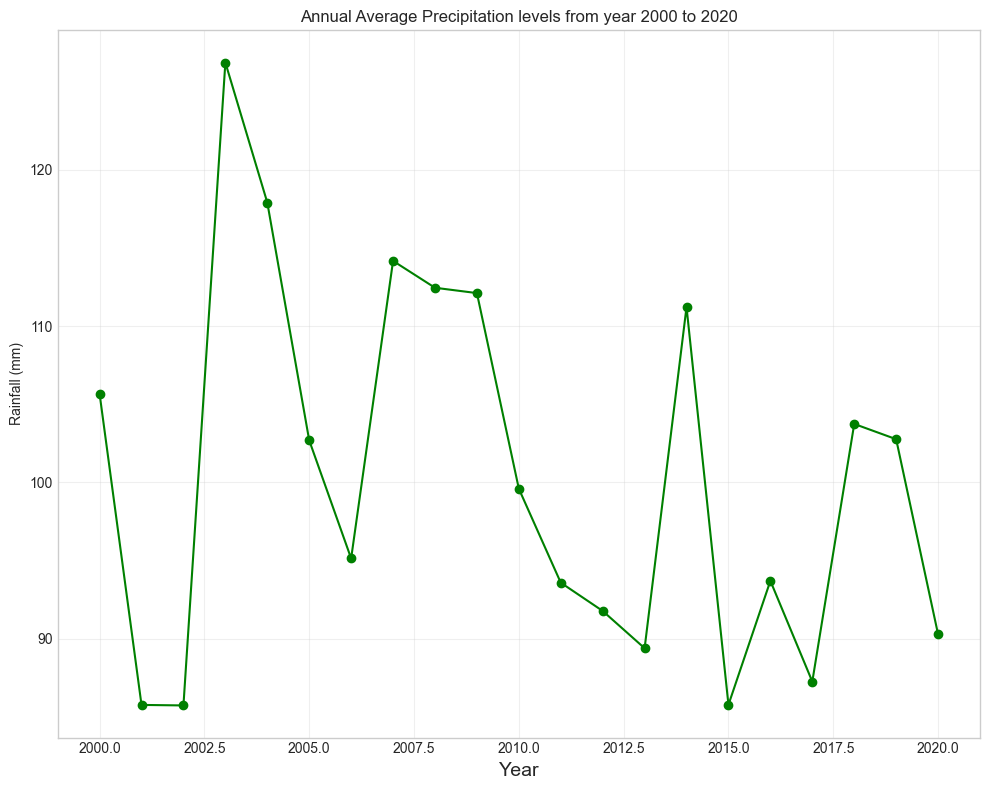

In [50]:
# precipitation levels over the years
plt.figure(figsize=(10,8))

plt.plot(annual_trend["Year"], annual_trend["Total_Rainfall_mm"], 'g', marker="o")
plt.title("Annual Average Precipitation levels from year 2000 to 2020")
plt.xlabel("Year", fontsize=14)
plt.ylabel("Rainfall (mm)")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Identify correlations: Heatmaps, scatter plots to understand relationships between variables

### Seasonal decomposition: Identify seasonal patterns using decomposition techniques (e.g., using seasonal_decompose from statsmodels).